# Аналитика с применением ML. Обучение с учителем. Классификация.

## Вам необходимо построить модель-классификатор по определению диабета.

<div style="text-align: center;\">
    <img src="https://atlas.ru/blog/content/images/size/w2000/2020/11/2020-11-17-Diabetes-1.png" width="700" height="400">
</div>

In [18]:
# Импортируем нужные библиотеки
import pandas as pd # для работы с данными
import numpy as np # для вычислений
import matplotlib.pyplot as plt # для визулизаций
import seaborn as sns # для визулизаций

import plotly.graph_objects as go # для визулизаций
from plotly.subplots import make_subplots 

from sklearn.linear_model import LogisticRegression # Линейная модель
from sklearn import preprocessing # предобработка
from sklearn import metrics # метрики
from sklearn.model_selection import train_test_split # выборка
%matplotlib inline

Повторим, как организуется процесс разработки DS-проектов согласно методологии CRISP-DM.

Этапы модели CRISP-DM:
1. Анализ требований
2. Иследование данных
3. Подготовка данных
4. Моделирование
5. Оценка модели
6. Внедрение

### Анализ требований

**Нам необходимо построить модель-классификатор по определению диабета.** У вас нет никаких ограничений по инструментам, новым полям и способу энкодинга данных. Есть данные для train и для test, нужно предсказать диабет для данных test. 

**Цель: F1-score был больше 0,85**

**Знакомство с данными**

In [2]:
# Считываем данные из таблицы
df = pd.read_csv(r'data\training_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) # удаляем ошибочную переменную "Unnamed: 0"
df.set_index("ID", inplace=True) # устанавливаем колонку "ID" как индекс
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
ID,,,,,,,,,
78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0


На каждой строке описано медицинские данные пациента:
1. gender - Пол
2. age - Возраст
3. hypertension - Гипертония
4. heart_disease - Болезни сердца
5. smoking_history - История курения
6. bmi - Индекс массы тела
7. HbA1c_level - Уровень HbA1c
8. blood_glucose_level - Уровень глюкозы в крови
9. diabetes - Диабет (**Целевая переменная**)

In [3]:
df.shape

(73718, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 78830894-cdd8-43d1-9655-03db74141b7a to a98d816c-f44e-4329-930b-58466aaa0bc7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               73718 non-null  object 
 1   age                  73718 non-null  float64
 2   hypertension         73718 non-null  int64  
 3   heart_disease        73718 non-null  int64  
 4   smoking_history      73718 non-null  object 
 5   bmi                  73718 non-null  float64
 6   HbA1c_level          73718 non-null  float64
 7   blood_glucose_level  73718 non-null  int64  
 8   diabetes             73718 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.6+ MB


Требуется изменить тип дынных некоторых колоннок.

In [5]:
# Изменение типа данных 'hypertension' на boolean
df['hypertension'] = df['hypertension'].astype(bool)
# Изменение типа данных 'heart_disease' на boolean
df['heart_disease'] = df['heart_disease'].astype(bool)
# Изменение типа данных 'diabetes' на boolean
df['diabetes'] = df['diabetes'].astype(bool)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 78830894-cdd8-43d1-9655-03db74141b7a to a98d816c-f44e-4329-930b-58466aaa0bc7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               73718 non-null  object 
 1   age                  73718 non-null  float64
 2   hypertension         73718 non-null  bool   
 3   heart_disease        73718 non-null  bool   
 4   smoking_history      73718 non-null  object 
 5   bmi                  73718 non-null  float64
 6   HbA1c_level          73718 non-null  float64
 7   blood_glucose_level  73718 non-null  int64  
 8   diabetes             73718 non-null  bool   
dtypes: bool(3), float64(3), int64(1), object(2)
memory usage: 4.1+ MB


### Исследование данных

Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

Выводим описательные статистики для числовых и категориальных признаков

In [7]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,73718.000000,73718.000000,73718.000000,73718.000000
mean,41.852959,27.348037,5.534038,138.197835
std,22.488153,6.776093,1.070917,40.892972
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.430000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.900000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [8]:
df.describe(include='object')

,gender,smoking_history
count,73718,73718
unique,3,6
top,Female,never
freq,43097,26296


In [9]:
# создаем копию для облегчения работы с таблицей
temp_data = df.copy()

In [10]:
types = temp_data.dtypes # типы данных колонок
num_features = list(types[(types != 'object') & (types != 'bool')].index) # берем все численные метрики
num_features

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Покажем визуализацией диаграмму рассеяния для числовых признаков. Дополнительно поверх диаграммы рассеяния построим отношения с целевой переменной.

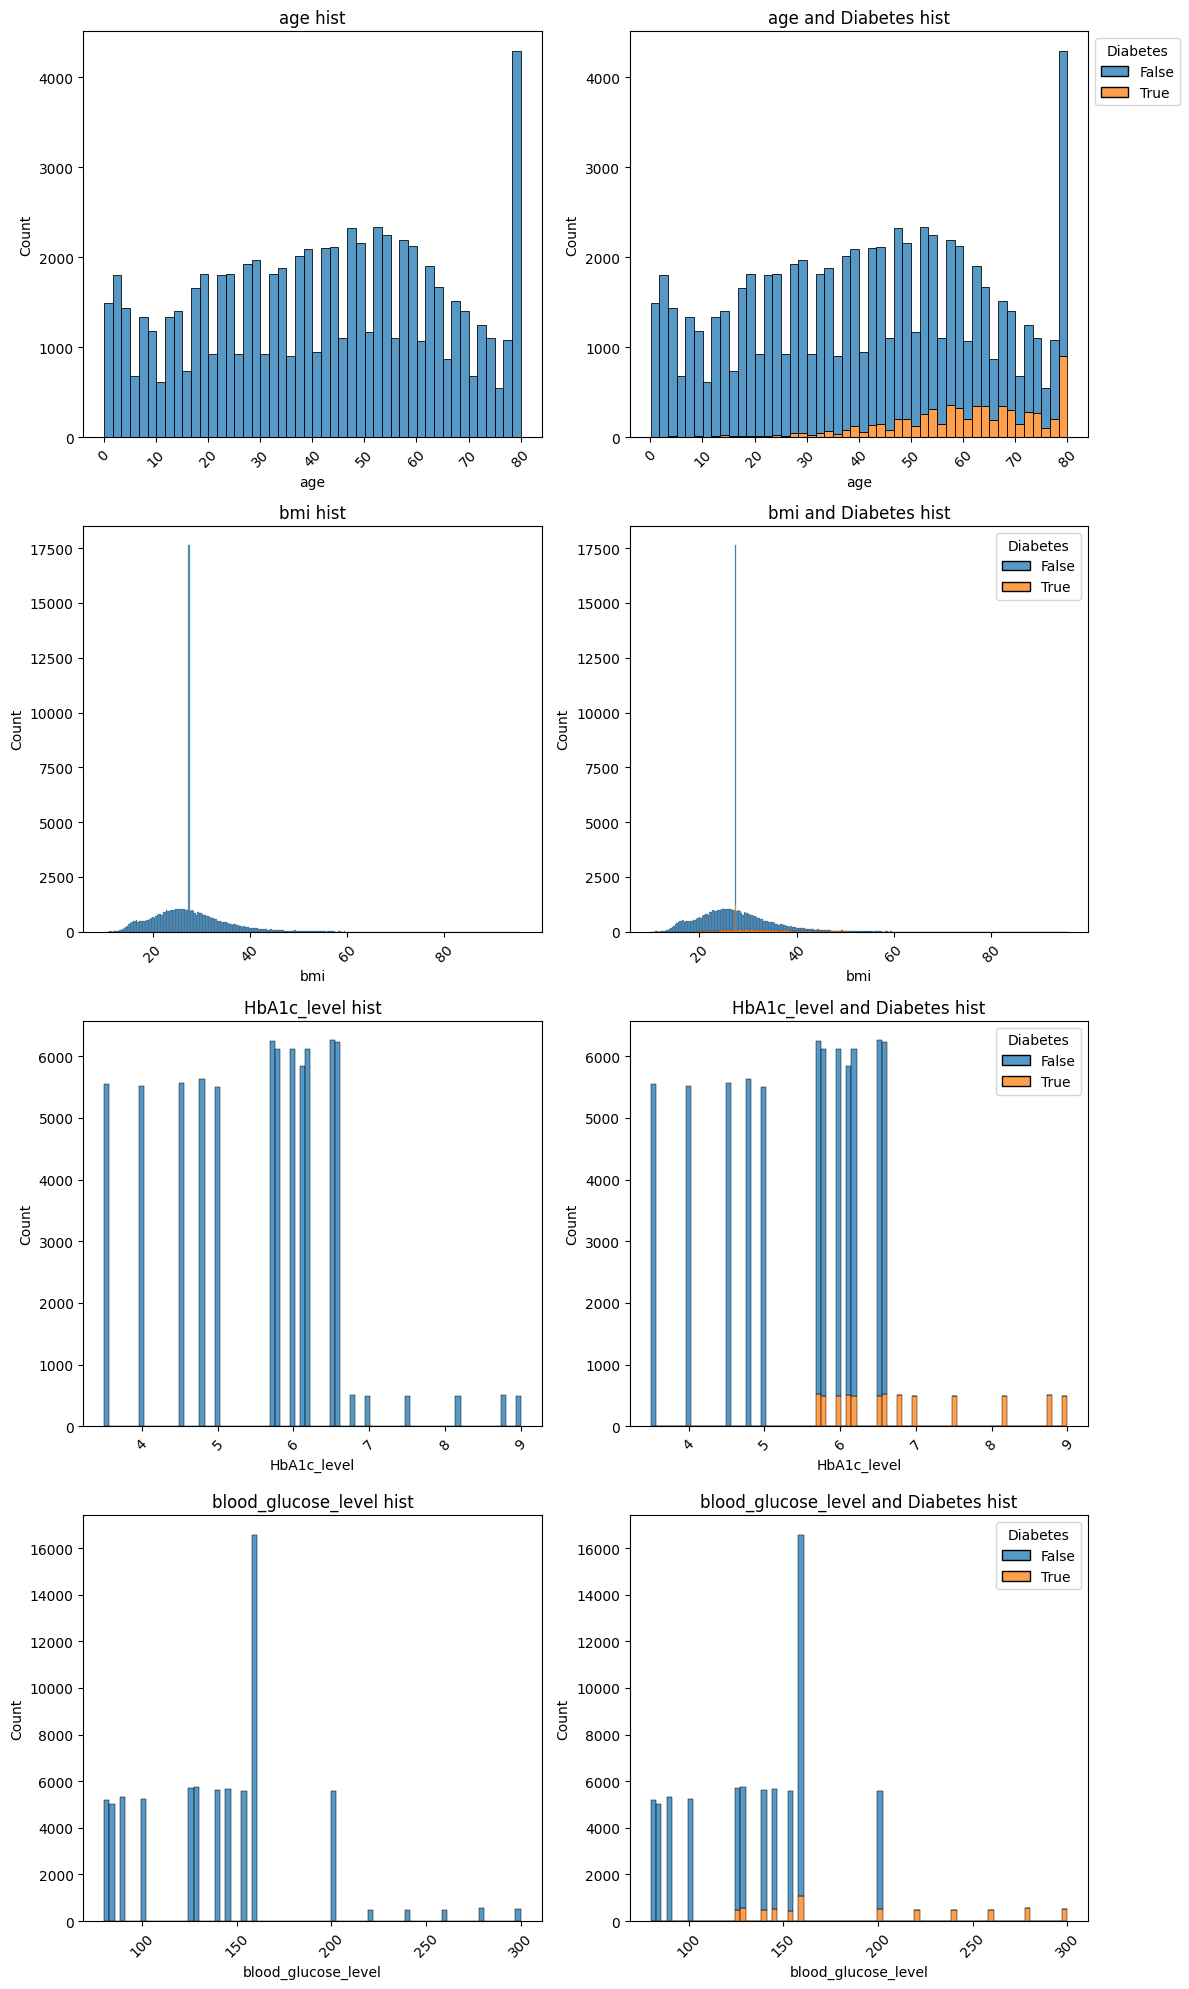

In [11]:
n = len(num_features)
fig, axis = plt.subplots(n, 2, figsize=(12, n*5))
for i, feature in enumerate(num_features):
    # Диаграмма рассеяния
    histplot_1 = sns.histplot(data=temp_data, x=feature, ax=axis[i][0])
    histplot_1.set_title('{} hist'.format(feature))
    histplot_1.xaxis.set_tick_params(rotation=45)
    # Диаграмма рассеяния + Целевая переменная
    histplot_2 = sns.histplot(data=temp_data, x=feature, hue='diabetes', multiple='stack', ax=axis[i][1])
    histplot_2.set_title('{} and Diabetes hist'.format(feature))
    histplot_2.xaxis.set_tick_params(rotation=45)
    # Добавление легенды вручную
    histplot_2.legend_.set_title('Diabetes')
    histplot_2.legend_.set_bbox_to_anchor((1, 1))
    
plt.tight_layout() # выравнивание графиков
plt.show()

Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между числовыми переменнами.

<Axes: >

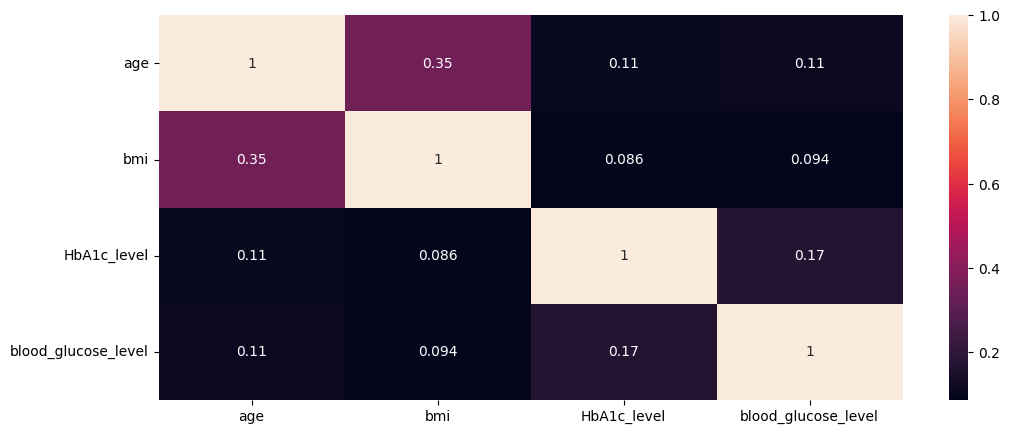

In [12]:
# Строим тепловую карту корреляций
fig, _ = plt.subplots(figsize=(12, 5))
sns.heatmap(temp_data[num_features].corr(), annot=True)

Покажем визуализацией Гистограмму для object и bool признаков и отношение к целевому признаку.

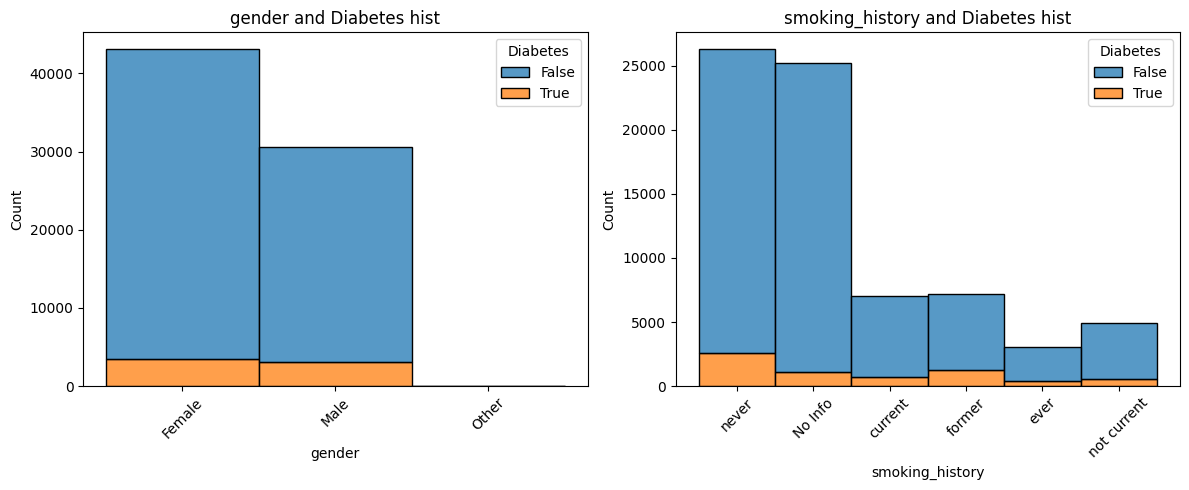

In [32]:
object_features = list(types[types == 'object'].index)

n = len(object_features)
fig, axis = plt.subplots(1, n, figsize=(n*6, 5))
for i, feature in enumerate(object_features):    
    # Гистограмма    
    histplot = sns.histplot(data=temp_data, x=feature, hue='diabetes', multiple='stack', ax=axis[i])
    histplot.set_title('{} and Diabetes hist'.format(feature))
    histplot.xaxis.set_tick_params(rotation=45)
    # Добавление легенды вручную
    histplot.legend_.set_title('Diabetes')
    histplot.legend_.set_bbox_to_anchor((1, 1))
    
plt.tight_layout() # выравнивание графиков
plt.show()

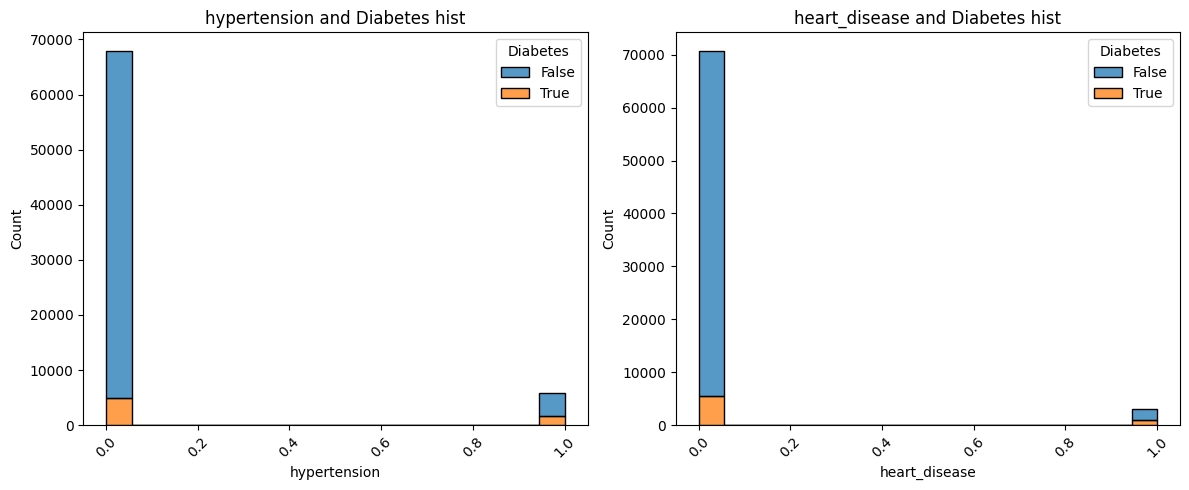

In [31]:
bool_features = list(types[types == 'bool'].index)
bool_features.pop(-1) # удалил "diabetes"

n = len(bool_features)
fig, axis = plt.subplots(1, n, figsize=(n*6, 5))
for i, feature in enumerate(bool_features):
    # Гистограмма    
    histplot = sns.histplot(data=temp_data, x=feature, hue='diabetes', multiple='stack', ax=axis[i])
    histplot.set_title('{} and Diabetes hist'.format(feature))
    histplot.xaxis.set_tick_params(rotation=45)
    # Добавление легенды вручную
    histplot.legend_.set_title('Diabetes')
    histplot.legend_.set_bbox_to_anchor((1, 1))
    
plt.tight_layout() # выравнивание графиков
plt.show()

### Подготовка данных